# Objective
Given a Bank customer, build a neural network based classifier that can determine whether they will leave or not in the next 6 months.

# Context
- Banks which provide service have to worry about problem of 'Churn' i.e. customers leaving and joining another service provider.
- It is important to understand which aspects of the service influence a customer's decision in this regard.

## 1. Import Libraries and load dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [2]:
bankData = pd.read_csv("bank.csv")

## 2. Shape of the dataset

In [3]:
bankData.shape

(10000, 14)

In [4]:
bankData.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

* No null values in data set

In [5]:
bankData.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


## 3. Univariate analysis

### 3.1 Dropping unique columns

In [6]:
bankData_reduced = bankData.drop({'RowNumber', 'CustomerId', 'Surname'}, axis=1)

bankData_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [7]:
bankData_reduced2 = bankData_reduced[["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary", "Exited"]]

In [8]:
bankData_reduced2.drop({'Exited'}, axis=1).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48


### 3.2 Find duplicated rows

In [9]:
bankData_reduced[bankData_reduced.duplicated(keep=False)]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


- There are 0 duplicated rows

### 3.3 Change data types

In [10]:
# Convert "Gender" and "Geography" field into categorical fields
bankData_reduced = bankData_reduced.astype({"Gender":'category', "Geography":'category'})
# Convert categorical fields into binary fields
bankData_reduced = pd.get_dummies(bankData_reduced)
# Convert all fields into the same data type - float
bankData_reduced = bankData_reduced.astype('float32')

bankData_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
CreditScore          10000 non-null float32
Age                  10000 non-null float32
Tenure               10000 non-null float32
Balance              10000 non-null float32
NumOfProducts        10000 non-null float32
HasCrCard            10000 non-null float32
IsActiveMember       10000 non-null float32
EstimatedSalary      10000 non-null float32
Exited               10000 non-null float32
Geography_France     10000 non-null float32
Geography_Germany    10000 non-null float32
Geography_Spain      10000 non-null float32
Gender_Female        10000 non-null float32
Gender_Male          10000 non-null float32
dtypes: float32(14)
memory usage: 547.0 KB


In [11]:
# Drop 'Gender_Male' column as it's fully correlated with 'Gender_Female' column

bankData_reduced.drop({'Gender_Male'}, axis=1, inplace=True)

### 3.4 Check "Exited" column

In [12]:
bankData_reduced["Exited"].value_counts()

0.0    7963
1.0    2037
Name: Exited, dtype: int64

* Dataset is heavily imbalanced, with only 20% of exited rows

## 4. Bi-variate analysis

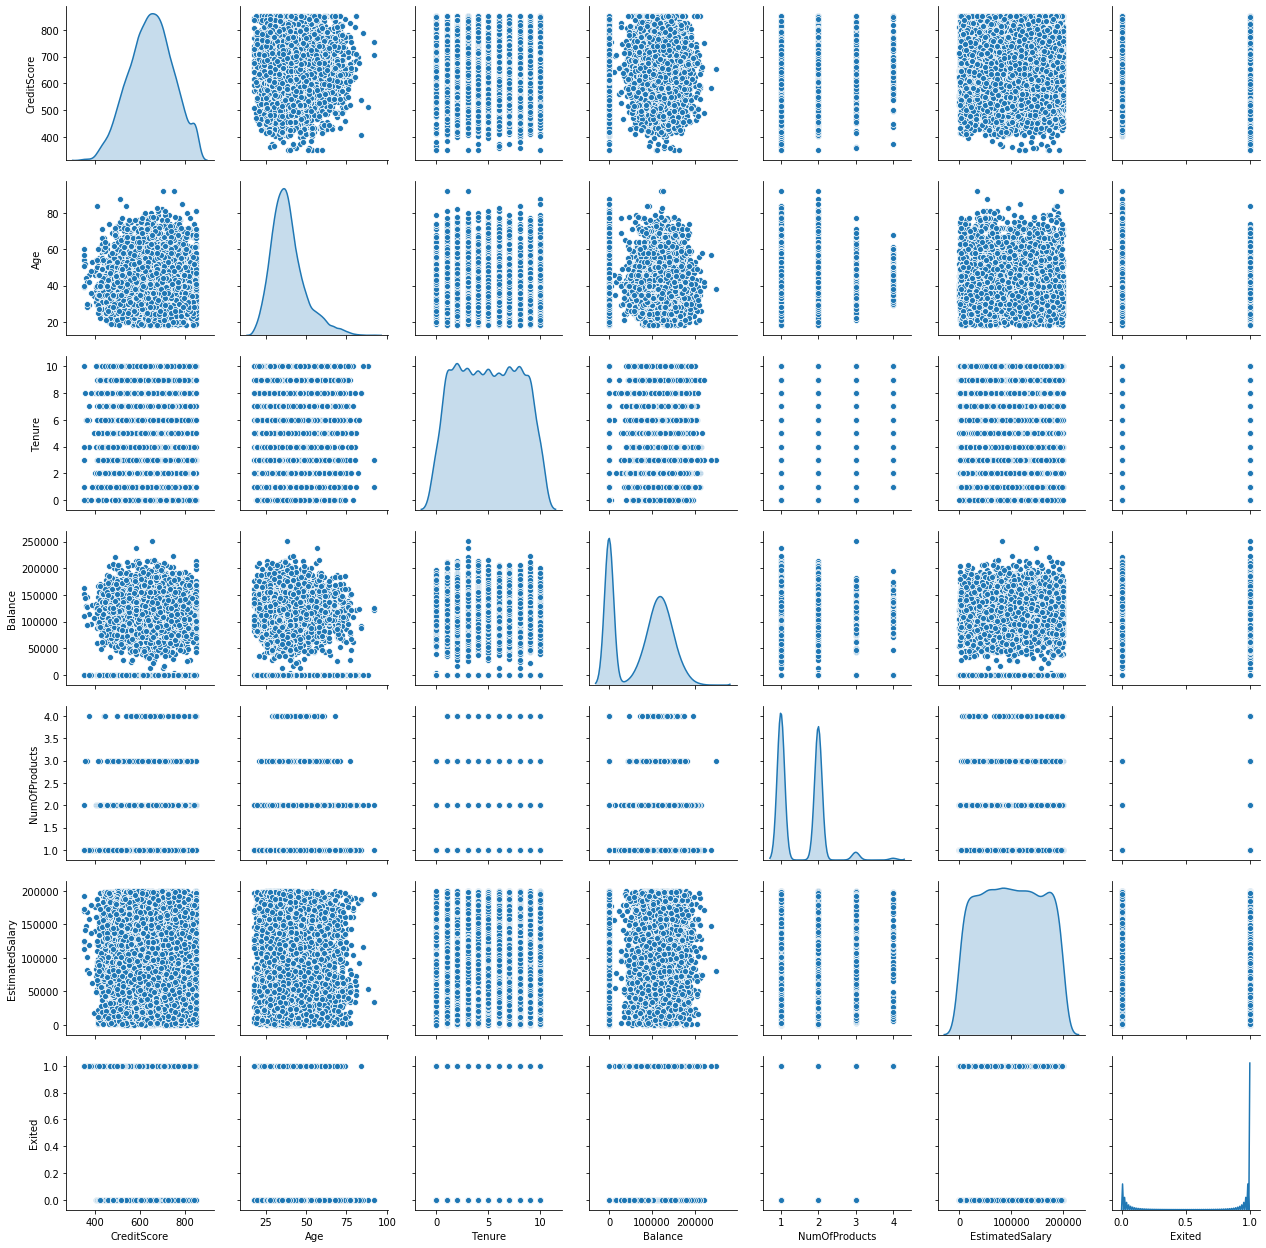

In [13]:
sns.pairplot(bankData_reduced2, diag_kind='kde')
plt.show()

In [14]:
bankData_reduced2.corr().mask(abs(bankData_reduced2.corr()) <= 0.7, np.nan)

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited
CreditScore,1.0,NaN,NaN,NaN,NaN,NaN,NaN
Age,NaN,1.0,NaN,NaN,NaN,NaN,NaN
Tenure,NaN,NaN,1.0,NaN,NaN,NaN,NaN
Balance,NaN,NaN,NaN,1.0,NaN,NaN,NaN
NumOfProducts,NaN,NaN,NaN,NaN,1.0,NaN,NaN
EstimatedSalary,NaN,NaN,NaN,NaN,NaN,1.0,NaN
Exited,NaN,NaN,NaN,NaN,NaN,NaN,1.0


* All numeric columns have very weak correlation between each other and with target "Exited" column

## 5. Divide the data set into training and test sets

In [15]:
from sklearn.model_selection import train_test_split

pred_threshold = 0.5

X = bankData_reduced.drop('Exited', axis=1)
y = bankData_reduced['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=1)

In [16]:
X_train.shape

(6400, 12)

In [17]:
X_val.shape

(1600, 12)

In [18]:
X_test.shape

(2000, 12)

## 6. Normalize data

In [19]:
columns = X_train.columns

from sklearn import preprocessing
normalizer = preprocessing.Normalizer().fit(X_train)
X_train_norm = pd.DataFrame(normalizer.transform(X_train), columns=columns)
X_val_norm = pd.DataFrame(normalizer.transform(X_val), columns=columns)
X_test_norm = pd.DataFrame(normalizer.transform(X_test), columns=columns)

In [20]:
X_train_norm.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female
0,0.004232,0.000288,0.000025,0.996589,0.000008,0.000008,0.000000,0.082413,0.000008,0.0,0.000000,0.000000
1,0.016500,0.000790,0.000044,0.000000,0.000044,0.000022,0.000022,0.999864,0.000000,0.0,0.000022,0.000000
2,0.004580,0.000284,0.000071,0.989863,0.000007,0.000007,0.000007,0.141954,0.000007,0.0,0.000000,0.000007
3,0.003031,0.000167,0.000047,0.743137,0.000010,0.000000,0.000005,0.669133,0.000000,0.0,0.000005,0.000000
4,0.003337,0.000175,0.000016,0.000000,0.000005,0.000005,0.000005,0.999994,0.000000,0.0,0.000005,0.000005


In [21]:
X_val_norm.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female
0,0.004702,0.000149,0.000033,0.534727,0.000011,0.000000,0.000000,0.845012,0.000006,0.000000,0.0,0.000000
1,0.005842,0.000462,0.000046,0.997896,0.000009,0.000009,0.000009,0.064567,0.000000,0.000009,0.0,0.000009
2,0.002123,0.000174,0.000010,0.800451,0.000010,0.000005,0.000005,0.599394,0.000005,0.000000,0.0,0.000000
3,0.003328,0.000139,0.000042,0.569146,0.000004,0.000000,0.000000,0.822229,0.000004,0.000000,0.0,0.000004
4,0.009946,0.000627,0.000142,0.000000,0.000040,0.000020,0.000020,0.999950,0.000020,0.000000,0.0,0.000020


In [22]:
X_test_norm.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female
0,0.005667,0.000484,0.000021,0.000000,0.000021,0.000010,0.000010,0.999984,0.000010,0.000000,0.0,0.000000
1,0.004304,0.000215,0.000019,0.907007,0.000006,0.000006,0.000000,0.421092,0.000006,0.000000,0.0,0.000000
2,0.005865,0.000464,0.000022,0.000000,0.000022,0.000000,0.000011,0.999983,0.000011,0.000000,0.0,0.000011
3,0.004802,0.000230,0.000054,0.999933,0.000014,0.000000,0.000007,0.010562,0.000000,0.000007,0.0,0.000000
4,0.002838,0.000157,0.000031,0.383986,0.000005,0.000005,0.000005,0.923334,0.000000,0.000005,0.0,0.000000


## 7. Build and evaluate the model

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import optimizers
import tensorflow as tf

# Clear the session and set a random seed
tf.keras.backend.clear_session()
tf.random.set_seed(1)

model = Sequential()

model.add(Dense(64, input_shape=(12,), activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

adam = optimizers.Adam(lr=0.001)
#sgd = optimizers.SGD()

model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Recall()])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                832       
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 1

In [24]:
history = model.fit(X_train_norm, y_train, validation_data = (X_val_norm, y_val), epochs=500, batch_size=800, verbose=0)

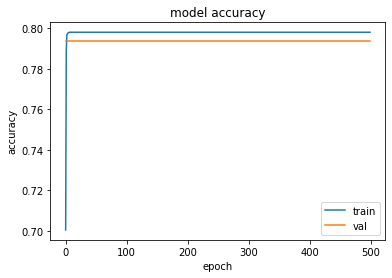

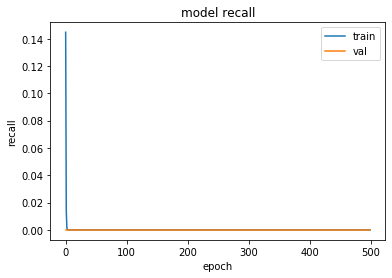

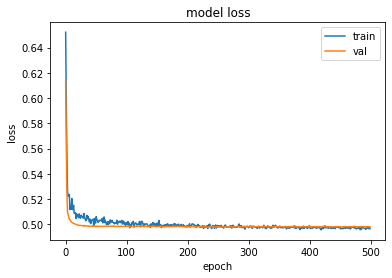

In [25]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()
# summarize history for recall
plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()

In [26]:
# Print Accuracy, Recall, Precision, F1 Score and Confusion Matrix

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

Y_pred_cls = np.where(model.predict(X_test_norm, batch_size=200, verbose=0) > pred_threshold, 1, 0)
accuracy = accuracy_score(y_test.values, Y_pred_cls)
recall = recall_score(y_test.values, Y_pred_cls)
precision = precision_score(y_test.values, Y_pred_cls)
f1 = f1_score(y_test.values, Y_pred_cls)

print('Accuracy score: '+ str(accuracy))
print('Recall score: ' + str(recall))
print('Precision score: ' + str(precision))
print('F1-score: ' + str(f1))

confusion_matrix(y_test.values, Y_pred_cls)

Accuracy score: 0.7925
Recall score: 0.0
Precision score: 0.0
F1-score: 0.0


C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[1585,    0],
       [ 415,    0]], dtype=int64)

In [27]:
resultsDf = pd.DataFrame({'Method':['Normalize + NN'], 
                          'Accuracy': [accuracy],
                          'Recall': [recall],
                          'F1': [f1]})
resultsDf

,Method,Accuracy,Recall,F1
0,Normalize + NN,0.7925,0.0,0.0


## 8. Scale data

In [28]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#scaler = StandardScaler()
scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=columns)
X_val_scaled = pd.DataFrame(scaler.transform(X_val), columns=columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=columns)

In [29]:
X_train_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,6400.0,0.602193,0.193403,0.0,0.468000,0.602000,0.736000,1.0
Age,6400.0,0.281805,0.142088,0.0,0.189189,0.256757,0.351351,1.0
Tenure,6400.0,0.506015,0.287406,0.0,0.300000,0.500000,0.800000,1.0
Balance,6400.0,0.305237,0.248003,0.0,0.000000,0.388196,0.508877,1.0
NumOfProducts,6400.0,0.177915,0.194765,0.0,0.000000,0.000000,0.333333,1.0
HasCrCard,6400.0,0.710938,0.453348,0.0,0.000000,1.000000,1.000000,1.0
IsActiveMember,6400.0,0.512656,0.499886,0.0,0.000000,1.000000,1.000000,1.0
EstimatedSalary,6400.0,0.499703,0.288640,0.0,0.251977,0.498929,0.747284,1.0
Geography_France,6400.0,0.495937,0.500021,0.0,0.000000,0.000000,1.000000,1.0
Geography_Germany,6400.0,0.254844,0.435804,0.0,0.000000,0.000000,1.000000,1.0


In [30]:
X_val_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,1600.0,0.594361,0.193093,0.000000,0.454000,0.604000,0.728000,1.000000
Age,1600.0,0.284079,0.139005,0.000000,0.189189,0.256757,0.351351,1.000000
Tenure,1600.0,0.488438,0.292919,0.000000,0.200000,0.500000,0.700000,1.000000
Balance,1600.0,0.302850,0.251031,0.000000,0.000000,0.382223,0.508448,0.861345
NumOfProducts,1600.0,0.174791,0.193539,0.000000,0.000000,0.000000,0.333333,1.000000
HasCrCard,1600.0,0.691250,0.462123,0.000000,0.000000,1.000000,1.000000,1.000000
IsActiveMember,1600.0,0.506875,0.500110,0.000000,0.000000,1.000000,1.000000,1.000000
EstimatedSalary,1600.0,0.503992,0.285733,0.000023,0.266792,0.500555,0.743985,0.999913
Geography_France,1600.0,0.512500,0.500003,0.000000,0.000000,1.000000,1.000000,1.000000
Geography_Germany,1600.0,0.249375,0.432789,0.000000,0.000000,0.000000,0.000000,1.000000


In [31]:
X_test_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,2000.0,0.602778,0.193156,0.000000,0.472000,0.608000,0.734000,1.000000
Age,2000.0,0.284594,0.142765,0.000000,0.189189,0.270270,0.351351,0.945946
Tenure,2000.0,0.496400,0.291754,0.000000,0.200000,0.500000,0.800000,1.000000
Balance,2000.0,0.305206,0.249153,0.000000,0.000000,0.388086,0.508827,0.882959
NumOfProducts,2000.0,0.174501,0.191372,0.000000,0.000000,0.000000,0.333333,1.000000
HasCrCard,2000.0,0.699500,0.458590,0.000000,0.000000,1.000000,1.000000,1.000000
IsActiveMember,2000.0,0.529500,0.499254,0.000000,0.000000,1.000000,1.000000,1.000000
EstimatedSalary,2000.0,0.499231,0.286504,-0.000401,0.254476,0.505884,0.746995,1.000109
Geography_France,2000.0,0.510000,0.500028,0.000000,0.000000,1.000000,1.000000,1.000000
Geography_Germany,2000.0,0.239500,0.426887,0.000000,0.000000,0.000000,0.000000,1.000000


## 9. Build and evaluate new model

In [32]:
# Clear the session and set a random seed
tf.keras.backend.clear_session()
tf.random.set_seed(1)

model2 = Sequential()

model2.add(Dense(64, input_shape=(12,), activation='relu'))
model2.add(Dropout(0.4))
model2.add(Dense(32, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(16, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(1, activation='sigmoid'))

adam = optimizers.Adam(lr=0.001)
#sgd = optimizers.SGD()

model2.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Recall()])
history = model2.fit(X_train_scaled, y_train, validation_data = (X_val_scaled, y_val), epochs=5000, batch_size=800, verbose=0)

In [33]:
Y_pred_cls = np.where(model2.predict(X_test_scaled, batch_size=200, verbose=0) > pred_threshold, 1, 0)
accuracy = accuracy_score(y_test.values, Y_pred_cls)
recall = recall_score(y_test.values, Y_pred_cls)
precision = precision_score(y_test.values, Y_pred_cls)
f1 = f1_score(y_test.values, Y_pred_cls)

print('Accuracy score: '+ str(accuracy))
print('Recall score: ' + str(recall))
print('Precision score: ' + str(precision))
print('F1-score: ' + str(f1))

confusion_matrix(y_test.values, Y_pred_cls)

Accuracy score: 0.857
Recall score: 0.4578313253012048
Precision score: 0.7569721115537849
F1-score: 0.5705705705705706


array([[1524,   61],
       [ 225,  190]], dtype=int64)

In [34]:
resultsDf = pd.concat([resultsDf, pd.DataFrame({'Method':['Scale + NN'], 
                          'Accuracy': [accuracy],
                          'Recall': [recall],
                          'F1': [f1]})])
resultsDf

,Method,Accuracy,Recall,F1
0,Normalize + NN,0.7925,0.000000,0.000000
0,Scale + NN,0.8570,0.457831,0.570571


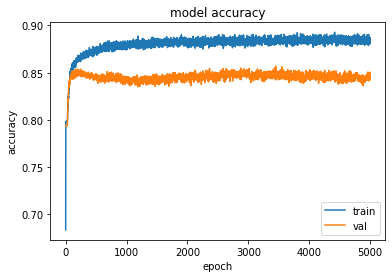

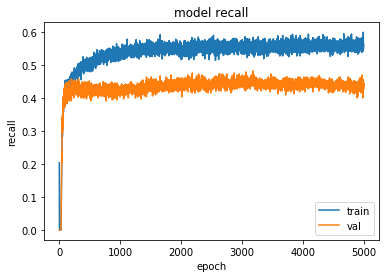

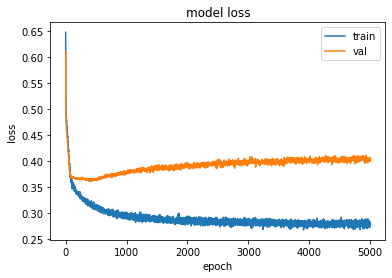

In [35]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()
# summarize history for recall
plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()

In [36]:
values = history.history['val_loss']
maxEpoch = values.index(min(values))
print("Epoch: " + str(maxEpoch) + ", validation accuracy: " + str(history.history['val_accuracy'][maxEpoch]))

Epoch: 428, validation accuracy: 0.85


In [37]:
# Re-trained with epochs=maxEpoch to get best test accuracy

# Clear the session and set a random seed
tf.keras.backend.clear_session()
tf.random.set_seed(1)

model3 = Sequential()

model3.add(Dense(64, input_shape=(12,), activation='relu'))
model3.add(Dropout(0.4))
model3.add(Dense(32, activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(16, activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(1, activation='sigmoid'))

adam = optimizers.Adam(lr=0.001)
#sgd = optimizers.SGD()

model3.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Recall()])
model3.fit(X_train_scaled, y_train, validation_data = (X_val_scaled, y_val), epochs=maxEpoch, batch_size=800, verbose=0)

In [38]:
Y_pred_cls = np.where(model3.predict(X_test_scaled, batch_size=200, verbose=0) > pred_threshold, 1, 0)
accuracy = accuracy_score(y_test.values, Y_pred_cls)
recall = recall_score(y_test.values, Y_pred_cls)
precision = precision_score(y_test.values, Y_pred_cls)
f1 = f1_score(y_test.values, Y_pred_cls)

print('Accuracy score: '+ str(accuracy))
print('Recall score: ' + str(recall))
print('Precision score: ' + str(precision))
print('F1-score: ' + str(f1))

confusion_matrix(y_test.values, Y_pred_cls)

Accuracy score: 0.865
Recall score: 0.4457831325301205
Precision score: 0.8222222222222222
F1-score: 0.578125


array([[1545,   40],
       [ 230,  185]], dtype=int64)

In [39]:
resultsDf = pd.concat([resultsDf, pd.DataFrame({'Method':['Scale + NN (retrained)'], 
                          'Accuracy': [accuracy],
                          'Recall': [recall],
                          'F1': [f1]})])
resultsDf

,Method,Accuracy,Recall,F1
0,Normalize + NN,0.7925,0.000000,0.000000
0,Scale + NN,0.8570,0.457831,0.570571
0,Scale + NN (retrained),0.8650,0.445783,0.578125


## 10. PCA scaled data

In [40]:
from sklearn.decomposition import PCA

n_PCA_components = 12
pca = PCA(n_components=n_PCA_components)
pca.fit(X_train_scaled)

columns = ['pca_%i' % i for i in range(n_PCA_components)]
X_train_scaled_pca = pd.DataFrame(pca.transform(X_train_scaled), columns=columns, index=X_train_scaled.index)
X_val_scaled_pca = pd.DataFrame(pca.transform(X_val_scaled), columns=columns, index=X_val_scaled.index)
X_test_scaled_pca = pd.DataFrame(pca.transform(X_test_scaled), columns=columns, index=X_test_scaled.index)
X_train_scaled_pca.shape

(6400, 12)

In [41]:
# Clear the session and set a random seed
tf.keras.backend.clear_session()
tf.random.set_seed(1)

model4 = Sequential()

model4.add(Dense(64, input_shape=(12,), activation='relu'))
model4.add(Dropout(0.4))
model4.add(Dense(32, activation='relu'))
model4.add(Dropout(0.2))
model4.add(Dense(16, activation='relu'))
model4.add(Dropout(0.2))
model4.add(Dense(1, activation='sigmoid'))

adam = optimizers.Adam(lr=0.001)
#sgd = optimizers.SGD()

model4.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Recall()])
history = model4.fit(X_train_scaled_pca, y_train, validation_data = (X_val_scaled_pca, y_val), epochs=5000, batch_size=800, verbose=0)

In [42]:
Y_pred_cls = np.where(model4.predict(X_test_scaled_pca, batch_size=200, verbose=0) > pred_threshold, 1, 0)
accuracy = accuracy_score(y_test.values, Y_pred_cls)
recall = recall_score(y_test.values, Y_pred_cls)
precision = precision_score(y_test.values, Y_pred_cls)
f1 = f1_score(y_test.values, Y_pred_cls)

print('Accuracy score: '+ str(accuracy))
print('Recall score: ' + str(recall))
print('Precision score: ' + str(precision))
print('F1-score: ' + str(f1))

confusion_matrix(y_test.values, Y_pred_cls)

Accuracy score: 0.8535
Recall score: 0.4819277108433735
Precision score: 0.7194244604316546
F1-score: 0.5772005772005772


array([[1507,   78],
       [ 215,  200]], dtype=int64)

In [43]:
resultsDf = pd.concat([resultsDf, pd.DataFrame({'Method':['Scale + PCA + NN'], 
                          'Accuracy': [accuracy],
                          'Recall': [recall],
                          'F1': [f1]})])
resultsDf

,Method,Accuracy,Recall,F1
0,Normalize + NN,0.7925,0.000000,0.000000
0,Scale + NN,0.8570,0.457831,0.570571
0,Scale + NN (retrained),0.8650,0.445783,0.578125
0,Scale + PCA + NN,0.8535,0.481928,0.577201


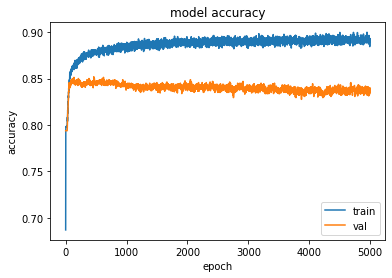

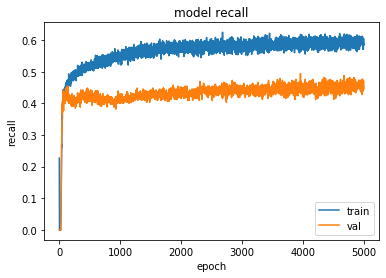

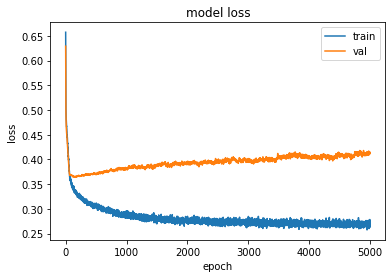

In [44]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()
# summarize history for recall
plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()

In [45]:
values = history.history['val_loss']
maxEpoch = values.index(min(values))
print("Epoch: " + str(maxEpoch) + ", validation accuracy: " + str(history.history['val_accuracy'][maxEpoch]))

Epoch: 137, validation accuracy: 0.84625


In [46]:
# Re-trained with epochs=maxEpoch to get best test accuracy

# Clear the session and set a random seed
tf.keras.backend.clear_session()
tf.random.set_seed(1)

model5 = Sequential()

model5.add(Dense(64, input_shape=(12,), activation='relu'))
model5.add(Dropout(0.4))
model5.add(Dense(32, activation='relu'))
model5.add(Dropout(0.2))
model5.add(Dense(16, activation='relu'))
model5.add(Dropout(0.2))
model5.add(Dense(1, activation='sigmoid'))

adam = optimizers.Adam(lr=0.001)
#sgd = optimizers.SGD()

model5.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Recall()])
model5.fit(X_train_scaled_pca, y_train, validation_data = (X_val_scaled_pca, y_val), epochs=maxEpoch, batch_size=800, verbose=0)

In [47]:
Y_pred_cls = np.where(model5.predict(X_test_scaled_pca, batch_size=200, verbose=0) > pred_threshold, 1, 0)
accuracy = accuracy_score(y_test.values, Y_pred_cls)
recall = recall_score(y_test.values, Y_pred_cls)
precision = precision_score(y_test.values, Y_pred_cls)
f1 = f1_score(y_test.values, Y_pred_cls)

print('Accuracy score: '+ str(accuracy))
print('Recall score: ' + str(recall))
print('Precision score: ' + str(precision))
print('F1-score: ' + str(f1))

confusion_matrix(y_test.values, Y_pred_cls)

Accuracy score: 0.858
Recall score: 0.42891566265060244
Precision score: 0.7911111111111111
F1-score: 0.55625


array([[1538,   47],
       [ 237,  178]], dtype=int64)

In [48]:
resultsDf = pd.concat([resultsDf, pd.DataFrame({'Method':['Scale + PCA + NN (retrained)'], 
                          'Accuracy': [accuracy],
                          'Recall': [recall],
                          'F1': [f1]})])
resultsDf

,Method,Accuracy,Recall,F1
0,Normalize + NN,0.7925,0.000000,0.000000
0,Scale + NN,0.8570,0.457831,0.570571
0,Scale + NN (retrained),0.8650,0.445783,0.578125
0,Scale + PCA + NN,0.8535,0.481928,0.577201
0,Scale + PCA + NN (retrained),0.8580,0.428916,0.556250


## 11. Set class_weight for imbalanced class Exited=0

In [49]:
class_weight = {0: 1., 1: 4.}

# Clear the session and set a random seed
tf.keras.backend.clear_session()
tf.random.set_seed(1)

model6 = Sequential()

model6.add(Dense(64, input_shape=(12,), activation='relu'))
model6.add(Dropout(0.4))
model6.add(Dense(32, activation='relu'))
model6.add(Dropout(0.2))
model6.add(Dense(16, activation='relu'))
model6.add(Dropout(0.2))
model6.add(Dense(1, activation='sigmoid'))

adam = optimizers.Adam(lr=0.001)
#sgd = optimizers.SGD()

model6.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Recall()])
history = model6.fit(X_train_scaled, y_train, validation_data = (X_val_scaled, y_val), epochs=5000, batch_size=800, verbose=0, class_weight=class_weight)

In [50]:
Y_pred_cls = np.where(model6.predict(X_test_scaled, batch_size=200, verbose=0) > pred_threshold, 1, 0)
accuracy = accuracy_score(y_test.values, Y_pred_cls)
recall = recall_score(y_test.values, Y_pred_cls)
precision = precision_score(y_test.values, Y_pred_cls)
f1 = f1_score(y_test.values, Y_pred_cls)

print('Accuracy score: '+ str(accuracy))
print('Recall score: ' + str(recall))
print('Precision score: ' + str(precision))
print('F1-score: ' + str(f1))

confusion_matrix(y_test.values, Y_pred_cls)

Accuracy score: 0.779
Recall score: 0.7204819277108434
Precision score: 0.4784
F1-score: 0.5750000000000001


array([[1259,  326],
       [ 116,  299]], dtype=int64)

In [51]:
resultsDf = pd.concat([resultsDf, pd.DataFrame({'Method':['Scale + class_weight + NN'], 
                          'Accuracy': [accuracy],
                          'Recall': [recall],
                          'F1': [f1]})])
resultsDf

,Method,Accuracy,Recall,F1
0,Normalize + NN,0.7925,0.000000,0.000000
0,Scale + NN,0.8570,0.457831,0.570571
0,Scale + NN (retrained),0.8650,0.445783,0.578125
0,Scale + PCA + NN,0.8535,0.481928,0.577201
0,Scale + PCA + NN (retrained),0.8580,0.428916,0.556250
0,Scale + class_weight + NN,0.7790,0.720482,0.575000


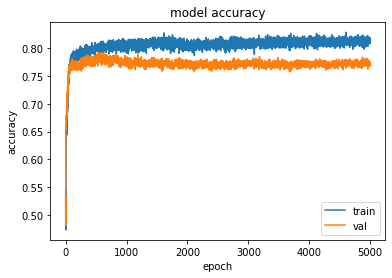

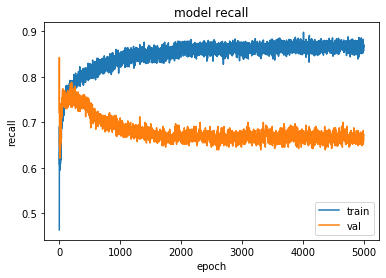

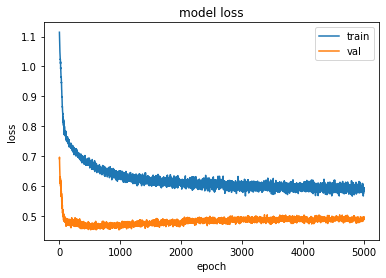

In [52]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()
# summarize history for recall
plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()

In [53]:
values = history.history['val_loss']
maxEpoch = values.index(min(values))
print("Epoch: " + str(maxEpoch) + ", validation accuracy: " + str(history.history['val_accuracy'][maxEpoch]))

Epoch: 979, validation accuracy: 0.785625


In [54]:
# Re-trained with epochs=maxEpoch to get best test accuracy

# Clear the session and set a random seed
tf.keras.backend.clear_session()
tf.random.set_seed(1)

model7 = Sequential()

model7.add(Dense(64, input_shape=(12,), activation='relu'))
model7.add(Dropout(0.4))
model7.add(Dense(32, activation='relu'))
model7.add(Dropout(0.2))
model7.add(Dense(16, activation='relu'))
model7.add(Dropout(0.2))
model7.add(Dense(1, activation='sigmoid'))

adam = optimizers.Adam(lr=0.001)
#sgd = optimizers.SGD()

model7.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Recall()])
model7.fit(X_train_scaled, y_train, validation_data = (X_val_scaled, y_val), epochs=maxEpoch, batch_size=800, verbose=0)

In [55]:
Y_pred_cls = np.where(model7.predict(X_test_scaled, batch_size=200, verbose=0) > pred_threshold, 1, 0)
accuracy = accuracy_score(y_test.values, Y_pred_cls)
recall = recall_score(y_test.values, Y_pred_cls)
precision = precision_score(y_test.values, Y_pred_cls)
f1 = f1_score(y_test.values, Y_pred_cls)

print('Accuracy score: '+ str(accuracy))
print('Recall score: ' + str(recall))
print('Precision score: ' + str(precision))
print('F1-score: ' + str(f1))

confusion_matrix(y_test.values, Y_pred_cls)

Accuracy score: 0.868
Recall score: 0.4674698795180723
Precision score: 0.8185654008438819
F1-score: 0.5950920245398773


array([[1542,   43],
       [ 221,  194]], dtype=int64)

In [56]:
resultsDf = pd.concat([resultsDf, pd.DataFrame({'Method':['Scale + class_weight + NN (retrained)'], 
                          'Accuracy': [accuracy],
                          'Recall': [recall],
                          'F1': [f1]})])
resultsDf

,Method,Accuracy,Recall,F1
0,Normalize + NN,0.7925,0.000000,0.000000
0,Scale + NN,0.8570,0.457831,0.570571
0,Scale + NN (retrained),0.8650,0.445783,0.578125
0,Scale + PCA + NN,0.8535,0.481928,0.577201
0,Scale + PCA + NN (retrained),0.8580,0.428916,0.556250
0,Scale + class_weight + NN,0.7790,0.720482,0.575000
0,Scale + class_weight + NN (retrained),0.8680,0.467470,0.595092


## 12. Oversampling data by SMOTE

In [57]:
from imblearn.over_sampling import SMOTE #pip install -U imbalanced-learn --user

# It's important to apply SMOTE only on train data to not introduce any data leak
sm = SMOTE(random_state = 1)
X_train_scaled_SMOTE, y_train_SMOTE = sm.fit_resample(X_train_scaled, y_train)

In [58]:
X_train_scaled_SMOTE.shape

(10216, 12)

In [59]:
y_train_SMOTE.value_counts()

1.0    5108
0.0    5108
Name: Exited, dtype: int64

In [60]:
# Clear the session and set a random seed
tf.keras.backend.clear_session()
tf.random.set_seed(1)

model8 = Sequential()

model8.add(Dense(64, input_shape=(12,), activation='relu'))
model8.add(Dropout(0.4))
model8.add(Dense(32, activation='relu'))
model8.add(Dropout(0.2))
model8.add(Dense(16, activation='relu'))
model8.add(Dropout(0.2))
model8.add(Dense(1, activation='sigmoid'))

adam = optimizers.Adam(lr=0.001)
#sgd = optimizers.SGD()

model8.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Recall()])
history = model8.fit(X_train_scaled_SMOTE, y_train_SMOTE, validation_data = (X_val_scaled, y_val), epochs=5000, batch_size=1000, verbose=0)

In [61]:
Y_pred_cls = np.where(model8.predict(X_test_scaled, batch_size=200, verbose=0) > pred_threshold, 1, 0)
accuracy = accuracy_score(y_test.values, Y_pred_cls)
recall = recall_score(y_test.values, Y_pred_cls)
precision = precision_score(y_test.values, Y_pred_cls)
f1 = f1_score(y_test.values,Y_pred_cls)

print('Accuracy score: '+ str(accuracy))
print('Recall score: ' + str(recall))
print('Precision score: ' + str(precision))
print('F1-score: ' + str(f1))

confusion_matrix(y_test.values, Y_pred_cls)

Accuracy score: 0.8055
Recall score: 0.6819277108433734
Precision score: 0.524074074074074
F1-score: 0.5926701570680627


array([[1328,  257],
       [ 132,  283]], dtype=int64)

In [62]:
resultsDf = pd.concat([resultsDf, pd.DataFrame({'Method':['Scale + SMOTE + NN'], 
                          'Accuracy': [accuracy],
                          'Recall': [recall],
                          'F1': [f1]})])

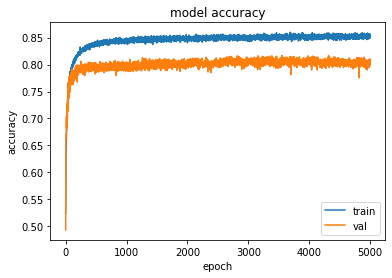

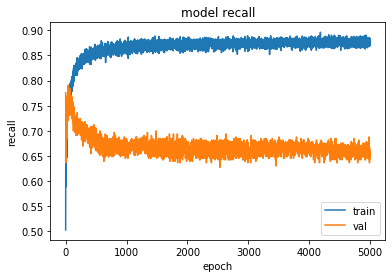

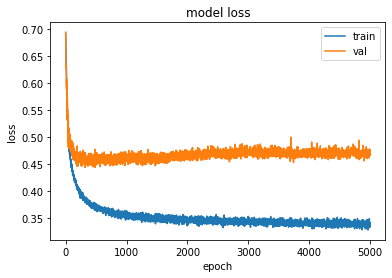

In [63]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()
# summarize history for recall
plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()

In [64]:
values = history.history['val_loss']
maxEpoch = values.index(min(values))
print("Epoch: " + str(maxEpoch) + ", validation accuracy: " + str(history.history['val_accuracy'][maxEpoch]))

Epoch: 318, validation accuracy: 0.800625


In [65]:
# Re-trained with epochs=maxEpoch to get best test accuracy

# Clear the session and set a random seed
tf.keras.backend.clear_session()
tf.random.set_seed(1)

model9 = Sequential()

model9.add(Dense(64, input_shape=(12,), activation='relu'))
model9.add(Dropout(0.4))
model9.add(Dense(32, activation='relu'))
model9.add(Dropout(0.2))
model9.add(Dense(16, activation='relu'))
model9.add(Dropout(0.2))
model9.add(Dense(1, activation='sigmoid'))

adam = optimizers.Adam(lr=0.001)
#sgd = optimizers.SGD()

model9.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Recall()])
model9.fit(X_train_scaled, y_train, validation_data = (X_val_scaled, y_val), epochs=maxEpoch, batch_size=800, verbose=0)

In [66]:
Y_pred_cls = np.where(model9.predict(X_test_scaled, batch_size=200, verbose=0) > pred_threshold, 1, 0)
accuracy = accuracy_score(y_test.values, Y_pred_cls)
recall = recall_score(y_test.values, Y_pred_cls)
precision = precision_score(y_test.values, Y_pred_cls)
f1 = f1_score(y_test.values,Y_pred_cls)

print('Accuracy score: '+ str(accuracy))
print('Recall score: ' + str(recall))
print('Precision score: ' + str(precision))
print('F1-score: ' + str(f1))

confusion_matrix(y_test.values, Y_pred_cls)

Accuracy score: 0.862
Recall score: 0.4674698795180723
Precision score: 0.7791164658634538
F1-score: 0.5843373493975903


array([[1530,   55],
       [ 221,  194]], dtype=int64)

In [67]:
resultsDf = pd.concat([resultsDf, pd.DataFrame({'Method':['Scale + SMOTE + NN (retrained)'], 
                          'Accuracy': [accuracy],
                          'Recall': [recall],
                          'F1': [f1]})])

## 13. Summary

In [68]:
resultsDf

,Method,Accuracy,Recall,F1
0,Normalize + NN,0.7925,0.000000,0.000000
0,Scale + NN,0.8570,0.457831,0.570571
0,Scale + NN (retrained),0.8650,0.445783,0.578125
0,Scale + PCA + NN,0.8535,0.481928,0.577201
0,Scale + PCA + NN (retrained),0.8580,0.428916,0.556250
0,Scale + class_weight + NN,0.7790,0.720482,0.575000
0,Scale + class_weight + NN (retrained),0.8680,0.467470,0.595092
0,Scale + SMOTE + NN,0.8055,0.681928,0.592670
0,Scale + SMOTE + NN (retrained),0.8620,0.467470,0.584337


* Models have the highest accuracy:<br/>
&emsp;1. Scale + class_weight + NN (retrained)<br/>
&emsp;2. Scale + NN (retrained)<br/>
&emsp;3. Scale + SMOTE + NN (rerained)<br/>
&emsp;4. Scale + PCA + NN (retrained)<br/>
&emsp;5. Scale + NN
* Models have the highest recall, which should be > 50%:<br/>
&emsp;1. Scale + class_weight + NN<br/>
&emsp;2. Scale + SMOTE + NN
* As we need model with both high accuracy and recall, "Scale + SMOTE + NN (retrained)" model should be considered